# Assignment: Clustering

This assingment aims to test your understanding of clustering.

## Exercise 1

Please implement and test the following distance metrics:

a) Euclidian distance

b) Manhattan distance

c) Pearson vorrelation coefficient

Please take into account that some features for some samples could be missing.

In [4]:
import numpy as np

def Handle_Nans(sample1, sample2):
    try: 
        filter = ~np.isnan(sample1) & ~np.isnan(sample2)
        return sample1[filter], sample2[filter]
    except ValueError:
        print("Arrays should be same size")
        return None, None

def Euclidian_dist(sample1, sample2):
    x1, x2 = Handle_Nans(sample1, sample2)
    if x1 is None or x2 is None:
        return None
    return np.sqrt(np.sum((x1-x2)**2))

def Manhattan_dist(sample1, sample2):
    x1, x2 = Handle_Nans(sample1, sample2)
    if x1 is None or x2 is None:
        return None
    return np.sum(np.abs(x1-x2))

def Pearson_dist(sample1, sample2):
    x1, x2 = Handle_Nans(sample1, sample2)
    if x1 is None or x2 is None:
        return None
    return 1 - np.corrcoef(x1, x2)[0, 1]

def main():
    sample1 = np.asarray([17, 28, 37, 23, 8, float('Nan')])
    sample2 = np.asarray([21, 35, float('Nan'), 23, 2, 5])
    
    print(Euclidian_dist(sample1, sample2))
    print(Manhattan_dist(sample1, sample2))
    print(Pearson_dist(sample1, sample2))
    
main()


10.04987562112089
17.0
0.026112336039608275


## Exercise 2

Please implement and test the silhouette score and compare its performance to silhouette_score from sklearn.metrics 

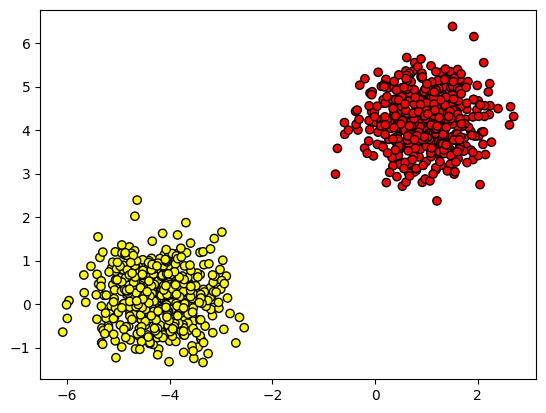

in-house silhouette score:
0.8371641514077857
silhouette score from sklearn:
0.8371641514077857


In [8]:
import numpy as np
from sklearn.datasets import make_blobs
from scipy.spatial import distance_matrix
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.pyplot as plt

def compute_elemtwise_distance(data):
    return distance_matrix(data, data)

def compute_silhouette_score_x(distance_map, labels, ind, n_clusters):
    own_cluster = labels[ind]
    

    same_cluster_mask = (labels == own_cluster) & (np.arange(len(labels)) != ind)
    a = np.mean(distance_map[ind][same_cluster_mask]) if same_cluster_mask.any() else 0
    
    # b: minimum mean distance to points in other clusters
    b = np.inf
    for cluster_id in range(n_clusters):
        if cluster_id != own_cluster:
            other_cluster_mask = (labels == cluster_id)
            if other_cluster_mask.any():
                mean_dist = np.mean(distance_map[ind][other_cluster_mask])
                b = min(b, mean_dist)
    
    b = b if b != np.inf else 0
    
    if max(a, b) == 0:
        return 0
    return (b - a) / max(a, b)

def compute_silhouette_score(data, labels, n_clusters):
    distance_map = compute_elemtwise_distance(data)
    score = []
    for i in range(0, len(labels)):
        score.append(compute_silhouette_score_x(distance_map, labels, i, n_clusters))
    return np.mean(score)

def main():
    n_clusters = 2
    data, labels = make_blobs(n_samples=1000, centers=n_clusters,
                      random_state=3, cluster_std=0.6)
    plt.scatter(data[:, 0], data[:, 1], c=labels, 
                cmap='autumn', linewidths=1, edgecolors='black')
    plt.show()
    
    print('in-house silhouette score:')
    print(compute_silhouette_score(data, labels, n_clusters))
    print('silhouette score from sklearn:')
    print(silhouette_score(data, labels))
    
main()

## Exercise 3

Please compute silhouette score for different number of clusters in k-Mean algorithm. Select the optimal k with the highest silhouette score.

You are allowed to use KMeans and silhouette_score from sklearn.

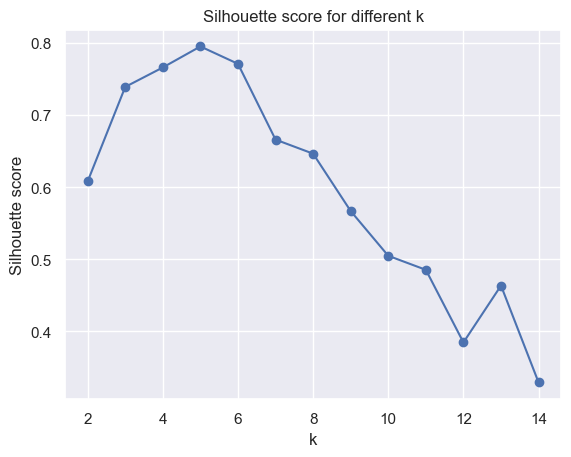

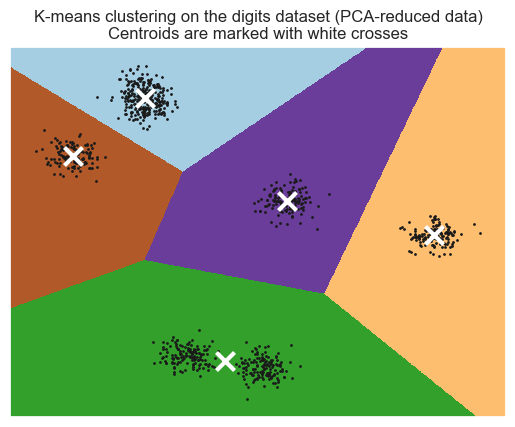

In [13]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting defaults
import seaborn as sns 
sns.set()
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

def visualizeKMeans(data, kmeans):
    h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

    # Plot the decision boundary. For that, we will assign a color to each
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Obtain labels for each point in mesh. Use last trained model.
    Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(1)
    plt.clf()
    plt.imshow(Z, interpolation='nearest',
               extent=(xx.min(), xx.max(), yy.min(), yy.max()),
               cmap=plt.cm.Paired,
               aspect='auto', origin='lower')

    plt.plot(data[:, 0], data[:, 1], 'k.', markersize=2)
    # Plot the centroids as a white X
    centroids = kmeans.cluster_centers_
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=169, linewidths=3,
                color='w', zorder=10)
    plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
              'Centroids are marked with white crosses')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(())
    plt.yticks(())
    plt.show()


def find_optimal_k(data, labels):
    silhouette_scores = []
    for k in range(2, 15):
        kmeans = KMeans(n_clusters=k).fit(data)
        score = silhouette_score(data, kmeans.labels_)
        silhouette_scores.append(score)
    
    plt.plot(range(2, 15), silhouette_scores, 'o-')
    plt.xlabel('k')
    plt.ylabel('Silhouette score')
    plt.title('Silhouette score for different k')
    plt.savefig('silhouette_score_3.png')
    plt.show()
    
    optimal_k = range(2, 15)[np.argmax(silhouette_scores)]
    return optimal_k

def main():
    n_clusters = 7
    plt.figure(0)
    data, labels = make_blobs(n_samples = 1000, centers = n_clusters,
                              random_state = 5, cluster_std = 0.5)
    
    k = find_optimal_k(data, labels)
    
    plt.figure(1)
    kmeans = KMeans(n_clusters = k).fit(data)
    visualizeKMeans(data, kmeans)
    
main()